# Newton’s Method

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

## Pure Newton’s Method

We consider the unconstrained problem 
$$\min_\mathbf{x}f(\mathbf{x}),$$
where $f(\cdot)$ is *twice* continuously differentiable over $\mathbb{R}^n$. 

Given $\mathbf{x}_k$, the next iteration $\mathbf{x}_{k+1}$ is obtained by minimizing the following quadratic approximation of the function around $\mathbf{x}$.
$$\mathbf{x}_{k+1}=\arg\min_{\mathbf{x}}f(\mathbf{x}_k)+\nabla f(\mathbf{x}_k)^\top(\mathbf{x}-\mathbf{x}_k)+{1\over 2}(\mathbf{x}-\mathbf{x}_k)^\top\nabla^2f(\mathbf{x}_k)(\mathbf{x}-\mathbf{x}_k)$$

We will further assume that $\nabla^2f(\mathbf{x}_k)$ is positive definite. Then the solution $\mathbf{x}_{k+1}$ is unique. In this case, we have 
$$\nabla f(\mathbf{x}_k)+\nabla^2f(\mathbf{x}_k)(\mathbf{x}_{k+1}-\mathbf{x}_k)=0$$
which means
$$\mathbf{x}_{k+1}=\mathbf{x}_k-(\nabla^2f(\mathbf{x}_k))^{-1}\nabla f(\mathbf{x})$$

The vector $-\nabla^2f(\mathbf{x}_k)^{-1}\nabla f(\mathbf{x}_k)$ is called the **Newton direction**, and the algorithm is called **the pure Newton's method**. 

**Here are some important notes about the Newton's method**:

1. If the Hessian is not positive definite, the Newton direction may not be a descent direction anymore. 

2. Newton's method is just a version of the scaled gradient method where the scaling matrix is chosen to be $\nabla^2f(\mathbf{x}_k))^{-1}$.

**Example 5.1 (Newton's method may not converge)** Let $$f(x)=\sqrt{1+x^2}$$ defined over $\mathbb{R}$. The minimizer of $f$ is $x=0$. The first and second derivative of $f$ is 
$$f'(x)={x\over\sqrt{1+x^2}},\quad f''(x)={1\over(1+x^2)^{3/2}}.$$
Then the Newton's method is 
$$x_{k+1}=x_k-{f'(x)\over f''(x)}=x_k-x_k(1+x_k^2)=-x_k^3.$$
Therefore, the Newton's method converges to the optimal solution when $|x_0|<1$. Otherwise it diverges when $|x_0|>1$, converges to $1$ when $x_0=1$, or alternating between $1$ and $-1$ when $x_0=-1$.

**Theorem 5.2 (quadratic local convergence of Newton’s method).** Let $f$ be a twice continuously differentiable function deﬁned over $\mathbb{R}^n$. Assume that
+ there exists $m>0$ such that $\nabla^2 f (\mathbf{x}) \succeq mI$ for any $\mathbf{x} \in\mathbb{R}^n$,
+ there exists $L>0$ such taht $\|\nabla^2 f (\mathbf{x})-\nabla^2 f (\mathbf{y})\|\leq L\|\mathbf{x}-\mathbf{y}\|$ for any $\mathbf{x},\mathbf{y} \in\mathbb{R}^n$.
Let $\{\mathbf{x}_k\}_{k\geq0}$ be the sequence generated by Newton’s method, and let $\mathbf{x}^∗$ be the unique minimizer of $f$ over $\mathbb{R}^n$. Then for any $k=0,1,\cdots,$ we have 
$$\|\mathbf{x}_k-\mathbf{x}^*\|\leq {L\over 2m}\|\mathbf{x}_k-\mathbf{x}^*\|^2.$$
In addition, if $\|\mathbf{x}_0-\mathbf{x}^*\|\leq {m\over L}$, then we have 
$$\|\mathbf{x}_k-\mathbf{x}^*\|\leq {2m\over L}\left({1\over2}\right)^{2^k},\quad\forall k=0,1,\cdots.$$

**Example 5.3.** Consider the minimization problem
$$min_{x,y} 100x^4 +0.01y^4,$$
whose optimal solution is $(0,0)$. The assumptions in Theorem 5.2 are not satisfied (no $m$ and $L$ can be found). 

We apply gradient descent with line search to solve this problem with $(s=1, \alpha=0.5, \beta=0.5, \epsilon=10^{-6})$.

In [2]:
def gradient_method_backtracking(f, g, x0, s=2, alpha=1/4, beta=0.5, epsilon=1e-5):
    x = x0
    grad = g(x)
    fun_val = f(x)
    ite = 0
    while (np.linalg.norm(grad) > epsilon) & (ite < 1e5):
        ite = ite + 1
        t = s
        while fun_val - f(x - t*grad) < alpha * t * np.linalg.norm(grad)**2:
            t = beta*t
        x = x - t*grad
        grad = g(x)
        fun_val = f(x)
        if (ite%1000==0):
           print("iter_number = %3d norm_grad = %2.6f fun_val = %2.6f" %(ite, np.linalg.norm(grad), fun_val))
    return x, fun_val

In [3]:
gradient_method_backtracking(lambda x: 100*x[0]**4+0.01*x[1]**4, lambda x: np.array([400*x[0]**3,0.04*x[1]**3]), np.array([1,1]), s=1, alpha=1/2, beta=0.5, epsilon=1e-6)

iter_number = 1000 norm_grad = 0.000055 fun_val = 0.000002
iter_number = 2000 norm_grad = 0.000020 fun_val = 0.000000
iter_number = 3000 norm_grad = 0.000011 fun_val = 0.000000
iter_number = 4000 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 5000 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 6000 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 7000 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 8000 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9000 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10000 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 11000 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 12000 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13000 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14000 norm_grad = 0.000001 fun_val = 0.000000


(array([0.00029248, 0.02923872]), 7.309321329278437e-09)

We apply the Newton's method

In [4]:
def pure_newton(f, g, h, x0, epsilon=1e-5):
    x = x0
    grad = g(x)
    hess = h(x)
    ite = 0
    while (np.linalg.norm(grad) > epsilon) & (ite < 1e4):
        ite = ite + 1
        x = x - np.linalg.solve(hess, grad)
        grad = g(x)
        hess = h(x)
        print("iter_number = %3d grad = %2.6f fun_val = %2.6f" %(ite, np.linalg.norm(grad), f(x)))
        if ite == 1e2:
            break
    if iter == 1e4:
        print("do not converge!!!")
    return x

In [5]:
pure_newton(lambda x: 100*x[0,0]**4+0.01*x[1,0]**4, lambda x: np.array([[400*x[0,0]**3],[0.04*x[1,0]**3]]), lambda x:np.array([[1200*x[0,0]**2, 0],[0,0.12*x[1,0]**2]]), np.array([[1],[1]]), 1e-6)

iter_number =   1 grad = 118.518519 fun_val = 19.755062
iter_number =   2 grad = 35.116598 fun_val = 3.902234
iter_number =   3 grad = 10.404918 fun_val = 0.770812
iter_number =   4 grad = 3.082939 fun_val = 0.152259
iter_number =   5 grad = 0.913463 fun_val = 0.030076
iter_number =   6 grad = 0.270656 fun_val = 0.005941
iter_number =   7 grad = 0.080194 fun_val = 0.001174
iter_number =   8 grad = 0.023761 fun_val = 0.000232
iter_number =   9 grad = 0.007040 fun_val = 0.000046
iter_number =  10 grad = 0.002086 fun_val = 0.000009
iter_number =  11 grad = 0.000618 fun_val = 0.000002
iter_number =  12 grad = 0.000183 fun_val = 0.000000
iter_number =  13 grad = 0.000054 fun_val = 0.000000
iter_number =  14 grad = 0.000016 fun_val = 0.000000
iter_number =  15 grad = 0.000005 fun_val = 0.000000
iter_number =  16 grad = 0.000001 fun_val = 0.000000
iter_number =  17 grad = 0.000000 fun_val = 0.000000


array([[0.00101496],
       [0.00101496]])

## Damped Newton’s Method

**Example 5.5.** Consider the optimization problem 
$$\min_{x,y}\sqrt{x^2+1}+\sqrt{y^2+1},$$
whose optimal solution is $(0,0)$. If we start with $(10,10)$, it diverges.

In [6]:
pure_newton(lambda x: np.sqrt(1+x[0,0]**2)+np.sqrt(1+x[1,0]**2), lambda x: np.array([[x[0,0]/np.sqrt(1+x[0,0]**2)],[x[1,0]/np.sqrt(1+x[1,0]**2)]]), lambda x: np.array([[1/(x[0,0]**2+1)**(3/2),0],[0,1/(x[1,0]**2+1)**(3/2)]]), np.array([[10],[10]]))

iter_number =   1 grad = 1.414213 fun_val = 2000.001000
iter_number =   2 grad = 1.414214 fun_val = 1999999999.999999
iter_number =   3 grad = 1.414214 fun_val = 1999999999999997277796040704.000000
iter_number =   4 grad = 1.414214 fun_val = 1999999999999992260078759655214123233773013273847240743173127608710117986469412864.000000
iter_number =   5 grad = 0.000000 fun_val = inf


<ipython-input-6-264045e424ac>:1: RuntimeWarning: overflow encountered in double_scalars
  pure_newton(lambda x: np.sqrt(1+x[0,0]**2)+np.sqrt(1+x[1,0]**2), lambda x: np.array([[x[0,0]/np.sqrt(1+x[0,0]**2)],[x[1,0]/np.sqrt(1+x[1,0]**2)]]), lambda x: np.array([[1/(x[0,0]**2+1)**(3/2),0],[0,1/(x[1,0]**2+1)**(3/2)]]), np.array([[10],[10]]))


array([[-1.e+243],
       [-1.e+243]])

Try different initial values.

In [7]:
pure_newton(lambda x: np.sqrt(1+x[0,0]**2)+np.sqrt(1+x[1,0]**2), lambda x: np.array([[x[0,0]/np.sqrt(1+x[0,0]**2)],[x[1,0]/np.sqrt(1+x[1,0]**2)]]), lambda x: np.array([[1/(x[0,0]**2+1)**(3/2),0],[0,1/(x[1,0]**2+1)**(3/2)]]), np.array([[0.99],[0.99]]))

iter_number =   1 grad = 0.984814 fun_val = 2.786740
iter_number =   2 grad = 0.953831 fun_val = 2.708884
iter_number =   3 grad = 0.857386 fun_val = 2.514889
iter_number =   4 grad = 0.572858 fun_val = 2.187502
iter_number =   5 grad = 0.122527 fun_val = 2.007549
iter_number =   6 grad = 0.000930 fun_val = 2.000000
iter_number =   7 grad = 0.000000 fun_val = 2.000000


array([[-2.84557859e-10],
       [-2.84557859e-10]])

In [8]:
[x, fun_val]=gradient_method_backtracking(lambda x: np.sqrt(1+x[0,0]**2)+np.sqrt(1+x[1,0]**2), lambda x: np.array([[x[0,0]/np.sqrt(1+x[0,0]**2)],[x[1,0]/np.sqrt(1+x[1,0]**2)]]), np.array([[10],[10]]), s =1, alpha=1/2, beta=0.5, epsilon=1e-8)

Since the Newton direction is a descent direction, we can apply linea search. 

In [9]:
def newton_backtracking(f, g, h, x0, s=1,alpha=1/2, beta=1/2, epsilon=1e-8):
    x = x0
    x_all = [x0]
    grad = g(x)
    hess = h(x)
    ite = 0
    while (np.linalg.norm(grad) > epsilon) & (ite < 1e4):
        ite = ite + 1
        d =  np.linalg.solve(hess, grad)
        t = s
        while f(x) - f(x - t*d) < alpha * t * d.T@grad:
            t = beta*t
        x = x - t*d
#        print(t)
        x_all.append(x)
        grad = g(x)
        hess = h(x)
        print("iter_number = %3d fun_val = %2.10f" %(ite, f(x)))
        if ite == 1e2:
            break
        if iter == 1e4:
            print("do not converge!!!")
    return x, x_all

In [10]:
x, x_all = newton_backtracking(lambda x: np.sqrt(1+x[0]**2)+np.sqrt(1+x[1]**2), lambda x: np.array([x[0]/np.sqrt(1+x[0]**2),x[1]/np.sqrt(1+x[1]**2)]), lambda x: np.array([[1/(x[0]**2+1)**(3/2),0],[0,1/(x[1]**2+1)**(3/2)]]), np.array([10,10]))

iter_number =   1 fun_val = 4.6688169339
iter_number =   2 fun_val = 2.4101973721
iter_number =   3 fun_val = 2.0336386321
iter_number =   4 fun_val = 2.0078992043
iter_number =   5 fun_val = 2.0019465555
iter_number =   6 fun_val = 2.0004849224
iter_number =   7 fun_val = 2.0001211240
iter_number =   8 fun_val = 2.0000302744
iter_number =   9 fun_val = 2.0000075682
iter_number =  10 fun_val = 2.0000018920
iter_number =  11 fun_val = 2.0000004730
iter_number =  12 fun_val = 2.0000001183
iter_number =  13 fun_val = 2.0000000296
iter_number =  14 fun_val = 2.0000000074
iter_number =  15 fun_val = 2.0000000018
iter_number =  16 fun_val = 2.0000000005
iter_number =  17 fun_val = 2.0000000001
iter_number =  18 fun_val = 2.0000000000


## The Cholesky Factorization (skipped)

## Hybrid Gradient-Newton Method

When the Hessian matrix is not positive definite (which can negative definite, indefinte, etc), we cannote apply the Newton method, in this case, we just use the gradient to replace the Newton direction. So we need a function to check whether the matrxi is positive definite or not.

+ Another way to check the direction is a disecent direction or not by check the sign of $\nabla f(\mathbf{x}_k)^\top\nabla^2f(\mathbf{x}_k)^{-1}\nabla f(\mathbf{x}_k)$, if it is positive, then it is a disecent direction, otherwise it is not.

In [11]:
def pd(K):
    return np.all(np.linalg.eigvals(K) > 1e-7)


In [12]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [13]:
def newton_hybrid(f, g, h, x0, s =1, alpha=1/2, beta=1/2, epsilon=1e-8):
    x = x0
    x_all = [x0]
    grad = g(x)
    hess = h(x)
    ite = 0
    while (np.linalg.norm(grad) > epsilon) & (ite < 1e4):
        ite = ite + 1
        if is_pos_def(hess):
            d = np.linalg.solve(hess, grad)      
        else:
            d = grad
        t = s
        while (f(x-t*d) > f(x)) or (f(x) - f(x - t*d) < alpha * t * d.T@grad):
            t = beta*t
        x = x - t*d
        x_all.append(x)
        grad = g(x)
        hess = h(x)
        print("iter_number = %3d fun_val = %2.10f" %(ite, f(x)))
        if ite == 1e2:
            break
        if iter == 1e4:
            print("do not converge!!!")
    return x, x_all

Recall the Rosenbrock function 
$$f(x,y)=100(y-x^2)^2+(1-x)^2$$
We use the hybrid Newton's method to solve it using the same starting point $(2,5)^\top$. The Hessian does not have to be positive definite. If the Hessian not positive definite, the Newton direction may not be a descent direction anymore. 

In [14]:
x, x_all = newton_backtracking(lambda x: 100*(x[1]-x[0]**2)**2+(1-x[0])**2, lambda x: np.array([-400*(x[1]-x[0]**2)*x[0]-2*(1-x[0]), 200*(x[1]-x[0]**2)]), lambda x: np.array([[-400*x[1]+1200*x[0]**2+2,-400*x[0]],[-400*x[0],200]]), np.array([2.,5.]))

iter_number =   1 fun_val = 26.0044001454
iter_number =   2 fun_val = 7.2637694662
iter_number =   3 fun_val = 2.5955339920
iter_number =   4 fun_val = 1.4639658887
iter_number =   5 fun_val = 1.2601223631
iter_number =   6 fun_val = 1.2601223631
iter_number =   7 fun_val = 1.2601223631
iter_number =   8 fun_val = 1.2601223631
iter_number =   9 fun_val = 1.2601223631
iter_number =  10 fun_val = 1.2601223631
iter_number =  11 fun_val = 1.2601223631
iter_number =  12 fun_val = 1.2601223631
iter_number =  13 fun_val = 1.2601223631
iter_number =  14 fun_val = 1.2601223631
iter_number =  15 fun_val = 1.2601223631
iter_number =  16 fun_val = 1.2601223631
iter_number =  17 fun_val = 1.2601223631
iter_number =  18 fun_val = 1.2601223631
iter_number =  19 fun_val = 1.2601223631
iter_number =  20 fun_val = 1.2601223631
iter_number =  21 fun_val = 1.2601223631
iter_number =  22 fun_val = 1.2601223631
iter_number =  23 fun_val = 1.2601223631
iter_number =  24 fun_val = 1.2601223631
iter_number =  

In [15]:
x, x_all = newton_hybrid(lambda x: 100*(x[1]-x[0]**2)**2+(1-x[0])**2, lambda x: np.array([-400*(x[1]-x[0]**2)*x[0]-2*(1-x[0]), 200*(x[1]-x[0]**2)]), lambda x: np.array([[-400*x[1]+1200*x[0]**2+2,-400*x[0]],[-400*x[0],200]]), np.array([2.,5.]))

iter_number =   1 fun_val = 3.2210220151
iter_number =   2 fun_val = 1.4965858368
iter_number =   3 fun_val = 1.1907599111
iter_number =   4 fun_val = 0.8316079074
iter_number =   5 fun_val = 0.6532105342
iter_number =   6 fun_val = 0.4435748821
iter_number =   7 fun_val = 0.2839328247
iter_number =   8 fun_val = 0.1717130532
iter_number =   9 fun_val = 0.0927468865
iter_number =  10 fun_val = 0.0459033814
iter_number =  11 fun_val = 0.0175406169
iter_number =  12 fun_val = 0.0055843227
iter_number =  13 fun_val = 0.0008378371
iter_number =  14 fun_val = 0.0000478728
iter_number =  15 fun_val = 0.0000001686
iter_number =  16 fun_val = 0.0000000000
iter_number =  17 fun_val = 0.0000000000


In [16]:
x = np.linspace(-4, 4, 1000)
y = np.linspace(-4, 6, 1000)
xmesh, ymesh = np.meshgrid(x,y)


In [17]:
def f(x):
    return 100*(x[1]-x[0]**2)**2+(1-x[0])**2
fmesh = f(np.array([xmesh, ymesh]))

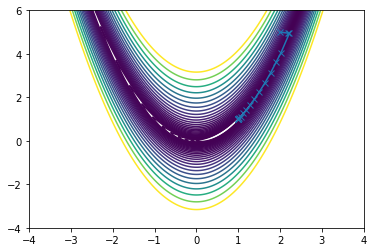

In [18]:
plt.contour(xmesh, ymesh, fmesh, np.logspace(0, 3, 30))
it_array = np.array(x_all)
plt.plot(it_array.T[0],it_array.T[1],'x-')